# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** covid_2022

**Team Members:**
- Andeol Albitre
- Ábel Boros
- Felix Breiteneder
- Angelika Vižintin

**Dataset Description:**  
(max. 75 words)

TODO

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/covid_data/CovidFaelle_Altersgruppe.csv', delimiter=';')

C:\Users\angel\AppData\Local\Temp\ipykernel_12788\3742279718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_barchart = df[(df['Bundesland'] == 'Österreich') & (df['Time'] == '10.11.2022 00:00:00')].groupby('Altersgruppe', as_index = False).sum()
C:\Users\angel\AppData\Local\Temp\ipykernel_12788\3742279718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_barchart = df_barchart.append(new_row, ignore_index=True)


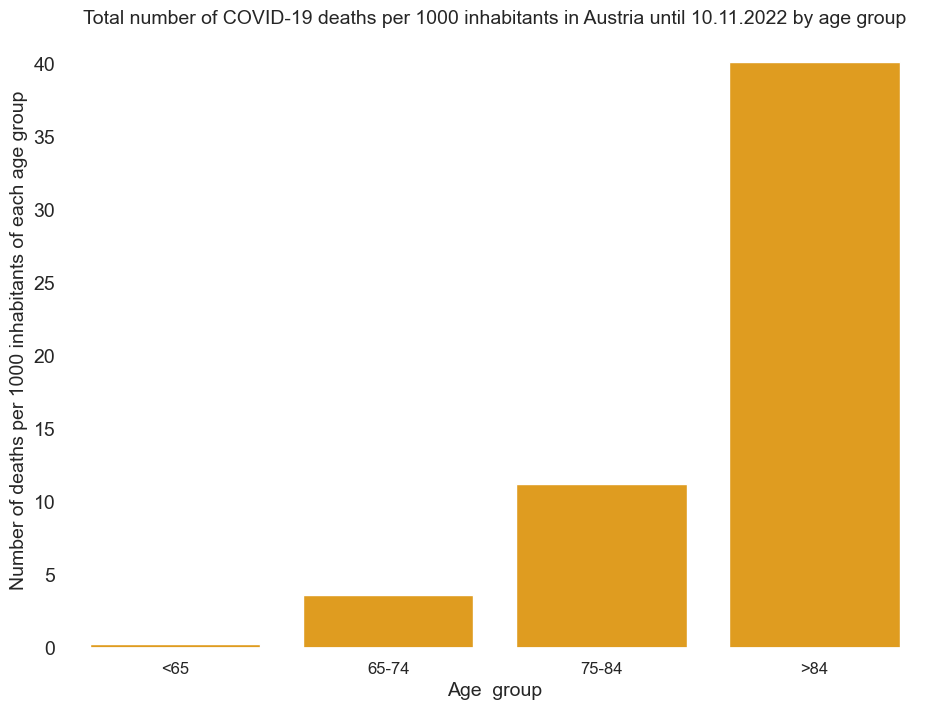

In [2]:
df_barchart = df[(df['Bundesland'] == 'Österreich') & (df['Time'] == '10.11.2022 00:00:00')].groupby('Altersgruppe', as_index = False).sum()
df_barchart.sort_values('AltersgruppeID', inplace=True)
new_row = df_barchart[(df_barchart['Altersgruppe'] == '<5') | (df_barchart['Altersgruppe'] == '5-14') | (df_barchart['Altersgruppe'] == '15-24') | (df_barchart['Altersgruppe'] == '25-34') | (df_barchart['Altersgruppe'] == '35-44') | (df_barchart['Altersgruppe'] == '45-54') | (df_barchart['Altersgruppe'] == '55-64')].aggregate('sum')
df_barchart = df_barchart.tail(df_barchart.shape[0] - 7)
df_barchart = df_barchart.append(new_row, ignore_index=True)
df_barchart.at[3, 'Altersgruppe'] = '<65'
df_barchart.at[3, 'AltersgruppeID'] = 10
df_barchart.sort_values('AltersgruppeID', inplace=True)
df_barchart['Proportion of death/1000'] = (df_barchart['AnzahlTot'] / df_barchart['AnzEinwohner']) * 1000
sns.set(rc = {'figure.figsize':(11,8)})
ax = sns.barplot(x=df_barchart['Altersgruppe'], y='Proportion of death/1000', color = 'orange', data=df_barchart)
ax.set_facecolor('white')
plt.xlabel('Age  group', fontsize=14)
plt.ylabel('Number of deaths per 1000 inhabitants of each age group', fontsize=14)
plt.title('Total number of COVID-19 deaths per 1000 inhabitants in Austria until 10.11.2022 by age group', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
#plt.savefig('figure1.png', dpi=600, format='png', bbox_inches='tight')
plt.show()

Figure 1: Total number of COVID-19 deaths per 1000 inhabitants in Austria until 10.11.2022 by age group (source of data: dataset CovidFaelle_Altersgruppe.csv from https://covid19-dashboard.ages.at/).

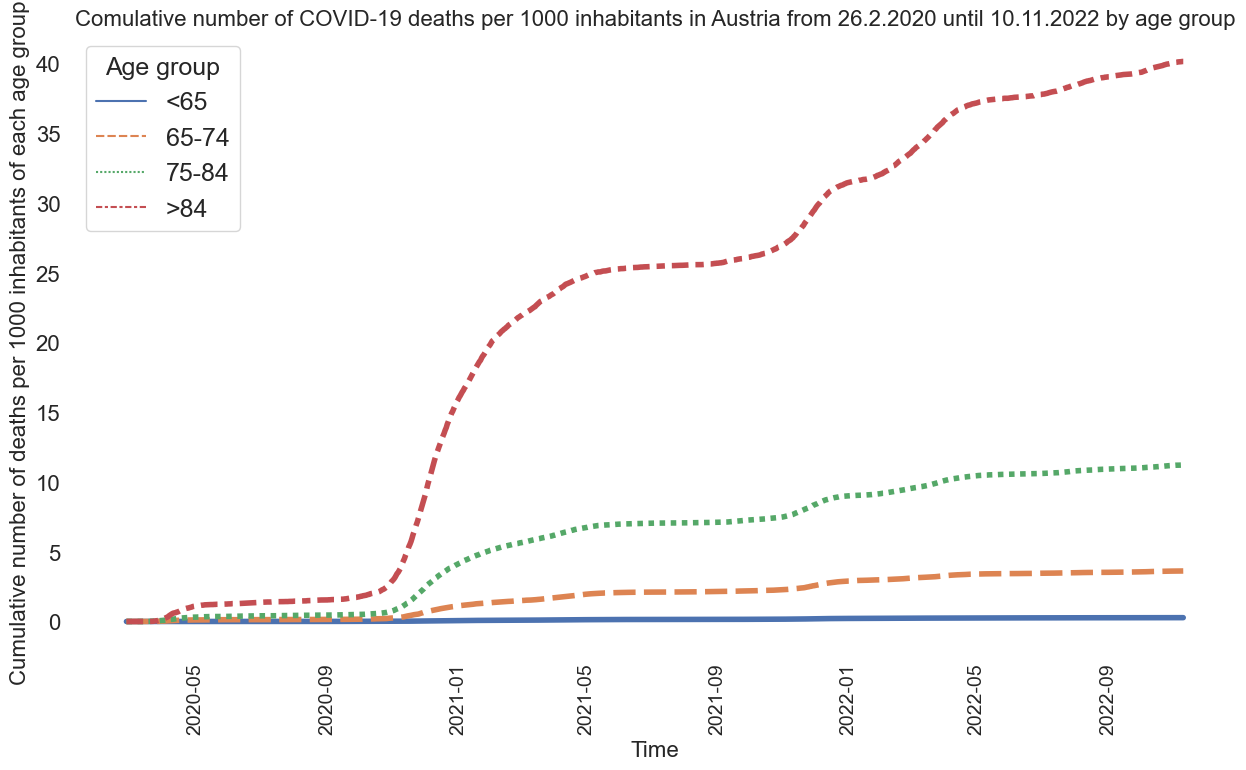

In [3]:
df_linechart = df[df['Bundesland'] == 'Österreich'].groupby(['Time', 'AltersgruppeID', 'Altersgruppe',], as_index = False)[['AnzEinwohner', 'AnzahlTot']].sum()
df_linechart['Time'] = df_linechart['Time'].str[0:10]
df_linechart['Time'] = pd.to_datetime(df_linechart['Time'], format='%d.%m.%Y')
df_linechart.loc[(df_linechart['Altersgruppe'] == '<5') | (df_linechart['Altersgruppe'] == '5-14') | (df_linechart['Altersgruppe'] == '15-24') | (df_linechart['Altersgruppe'] == '25-34') | (df_linechart['Altersgruppe'] == '35-44') | (df_linechart['Altersgruppe'] == '45-54') | (df_linechart['Altersgruppe'] == '55-64'), 'Altersgruppe'] = '<65'
df_linechart.loc[(df_linechart['Altersgruppe'] == '<65'), 'AltersgruppeID'] = 1
df_linechart = df_linechart.groupby(['Time', 'AltersgruppeID', 'Altersgruppe',], as_index = False)[['AnzEinwohner', 'AnzahlTot']].sum()
df_linechart['Proportion of death/1000'] = (df_linechart['AnzahlTot'] / df_linechart['AnzEinwohner']) * 1000
df_linechart.sort_values('AltersgruppeID', inplace=True)

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x='Time', y='Proportion of death/1000', hue='Altersgruppe', style="Altersgruppe", data=df_linechart, linewidth=4)
ax.set_facecolor('white')
plt.title('Comulative number of COVID-19 deaths per 1000 inhabitants in Austria from 26.2.2020 until 10.11.2022 by age group', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Cumulative number of deaths per 1000 inhabitants of each age group', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.legend(loc = 'upper left', title = 'Age group', title_fontsize=18, fontsize=18, facecolor='white')
leg = plt.legend
#plt.savefig('figure2.png', dpi=600, format='png', bbox_inches='tight')
plt.show()

Figure 2: Comulative number of COVID-19 deaths per 1000 inhabitants in Austria from 26.2.2020 until 10.11.2022 by age group (source of data: dataset CovidFaelle_Altersgruppe.csv from https://covid19-dashboard.ages.at/).

### Description

The aim of Figure 1 and 2 is to investigate the hypothesis "The number of deaths of COVID-19 patients is the highest in the 85+ group in all Austria.". The displayed data on both figures were normalized by the total number of inhabitants of each age group, excluding the possibility that the number of deaths in one age group would appear high only because it is the largest group. Both figures support the hypothesis that the number of deaths is the highest in the 85+ group.